In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Importing the Movies Dataset which is downloaded from Kaggle. Te actual source of this dataset is IMDB.

In [110]:
df = pd.read_csv("movies_2000_to_2024.csv")

In [111]:
df.shape

(13350, 24)

In [112]:
df.columns

Index(['Unnamed: 0', 'Title', 'Movie Link', 'Year', 'Duration', 'MPA',
       'Rating', 'Votes', 'budget', 'grossWorldWide', 'gross_US_Canada',
       'opening_weekend_Gross', 'directors', 'writers', 'stars', 'genres',
       'countries_origin', 'filming_locations', 'production_companies',
       'Languages', 'wins', 'nominations', 'oscars', 'release_date'],
      dtype='object')

# Column descriptions

- `Title`: Movie title.
- `Movie Link`: IMDb URL for the movie.
- `Year`: Year of release.
- `Duration`: Runtime (in minutes).
- `MPA`: Motion Picture Association rating (e.g., PG, R).
- `Rating`: IMDb rating (scale of 1–10).
- `Votes`: Total user votes on IMDb.
- `Budget`: Production budget (in USD).
- `grossWorldWide`: Global box office revenue.
- `gross_US_Canada`: North American box office earnings.
- `opening_weekend_Gross`: Opening weekend revenue.
- `directors`: List of directors.
- `writers`: List of writers.
- `stars`: Main cast members.
- `genres`: Movie genres.
- `countries_origin`: Countries of production.
- `filming_locations`: Primary filming locations.
- `production_companies`: Associated production companies.
- `Languages`: Languages spoken in the movie.
- `wins`: Number of awards won.
- `nominations`: Total award nominations.
- `oscars`: Oscar nominations.
- `release_date`: Official release date.

In [113]:
df.sample(5)

,Unnamed: 0,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,...,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars,release_date
2378,2378,329. Dig!,https://www.imdb.com/title/tt0388888/?ref_=sr_...,2004,1h 47m,R,7.7,6.8K,NaN,228828.0,...,"['Anton Newcombe', 'Courtney Taylor-Taylor', '...","['Documentary', 'Music']",['United States'],"['Los Angeles, California, USA']",['Interloper Films'],['English'],0,0,0,2004.0
13121,13121,372. The Program,https://www.imdb.com/title/tt33549764/?ref_=sr...,2024,1h 42m,NaN,7.1,443,NaN,NaN,...,"['Bryan Bender', 'Scott Bray', 'Tim Burchett']",['Documentary'],['United States'],[],['Lab 9 Films'],[],0,0,0,2024.0
3406,3406,257. I Served the King of England,https://www.imdb.com/title/tt0284363/?ref_=sr_...,2006,1h 53m,R,7.3,8.3K,84450000.0,7354478.0,...,"['Ivan Barnev', 'Oldrich Kaiser', 'Julia Jents...","['Satire', 'Comedy', 'Drama', 'Romance', 'War']","['Czech Republic', 'Slovakia']","['Harrachov, Czech Republic']","['AQS', 'Barrandov Studios', 'Bioscop']","['Czech', 'German', 'French', 'English', 'Ital...",0,13,0,2006.0
11210,11210,111. Pushpa: The Rise - Part 1,https://www.imdb.com/title/tt9389998/?ref_=sr_...,2021,2h 59m,NaN,7.6,94K,NaN,7592374.0,...,"['Allu Arjun', 'Fahadh Faasil', 'Rashmika Mand...","['Action Epic', 'One-Person Army Action', 'Act...",['India'],"['Rajahmundry, Andhra Pradesh, India']","['Mythri Movie Makers', 'Muttamsetty Media']",['Telugu'],0,13,0,2021.0
2640,2640,591. Raincoat,https://www.imdb.com/title/tt0405266/?ref_=sr_...,2004,1h 57m,Not Rated,7.7,5.3K,NaN,610056.0,...,"['Ajay Devgn', 'Aishwarya Rai Bachchan', 'Annu...","['Drama', 'Romance']",['India'],"['Calcutta, West Bengal, India']",['SVF Entertainment'],['Hindi'],0,4,0,2004.0


# Data Assessment

### 1. Dirty data
- some values are missing in MPA, votes, duration, rating, grossWorldWide, gross_US_Canada and opening_weekend_Gross columns `completeness`
- huge amount of data in budget column is missing `completeness`
- In title column, some numbers are also associated with the movie title `accuracy`
- In duration column, duration is written in the form hours and minutes. `accuracy`
- In the votes column, the letter 'K' is associated with each value. `accuracy`
- In the votes column, some values are associated with the letter 'M' instead of 'K'. So, their conversion is required. `consistency`
- In the votes column, some values are not associated with any letter. So, their conversion is required. `consistency`
- 'MPA', 'Languages' and 'countries_origin' columns' dtype is object instead of category. `validity`
- 'Duration' and 'votes' columns' dtype is object instead of int. `validity`

### 2. Messy data
- values in directors column are in list which are typecasted to string form
- there are maximum 3 directors in the above mentioned list
- same problems as above in the columns - 'writers', 'stars', 'genres', 'countries_origin', 'filming_locations', 'production_companies' and 'Languages'
- some lists in the above columns are empty
- Irrelevant columns - 'Unnamed: 0', 'Movie Link' and 'release_date'. 'release_date' col is irrelevant because it is same as 'Year' column
- wins, nominations and oscars columns contain inaccurate information.

In [114]:
df.columns

Index(['Unnamed: 0', 'Title', 'Movie Link', 'Year', 'Duration', 'MPA',
       'Rating', 'Votes', 'budget', 'grossWorldWide', 'gross_US_Canada',
       'opening_weekend_Gross', 'directors', 'writers', 'stars', 'genres',
       'countries_origin', 'filming_locations', 'production_companies',
       'Languages', 'wins', 'nominations', 'oscars', 'release_date'],
      dtype='object')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13350 entries, 0 to 13349
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             13350 non-null  int64  
 1   Title                  13350 non-null  object 
 2   Movie Link             13350 non-null  object 
 3   Year                   13350 non-null  int64  
 4   Duration               13319 non-null  object 
 5   MPA                    11402 non-null  object 
 6   Rating                 13306 non-null  float64
 7   Votes                  13306 non-null  object 
 8   budget                 6177 non-null   float64
 9   grossWorldWide         12261 non-null  float64
 10  gross_US_Canada        11707 non-null  float64
 11  opening_weekend_Gross  11103 non-null  float64
 12  directors              13350 non-null  object 
 13  writers                13350 non-null  object 
 14  stars                  13350 non-null  object 
 15  ge

In [116]:
df.describe()

,Unnamed: 0,Year,Rating,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,wins,nominations,oscars,release_date
count,13350.000000,13350.000000,13306.000000,6.177000e+03,1.226100e+04,1.170700e+04,1.110300e+04,13350.0,13350.000000,13350.000000,13070.000000
mean,6674.500000,2012.154082,6.360762,1.384631e+08,4.446064e+07,1.864717e+07,5.778203e+06,0.0,10.123895,0.099476,2012.158761
std,3853.957382,7.272332,1.060659,3.939041e+09,1.381493e+08,5.419042e+07,1.715864e+07,0.0,26.659478,0.498548,7.348904
min,0.000000,2000.000000,1.100000,1.000000e+00,9.500000e+01,8.000000e+01,1.100000e+01,0.0,0.000000,0.000000,2000.000000
25%,3337.250000,2006.000000,5.800000,4.000000e+06,1.444460e+05,5.540350e+04,1.081200e+04,0.0,0.000000,0.000000,2006.000000
50%,6674.500000,2012.000000,6.500000,1.500000e+07,1.818293e+06,3.805940e+05,5.976100e+04,0.0,0.000000,0.000000,2012.000000
75%,10011.750000,2019.000000,7.100000,4.200000e+07,2.296370e+07,9.360405e+06,2.546696e+06,0.0,9.000000,0.000000,2019.000000
max,13349.000000,2024.000000,9.600000,3.000000e+11,2.923706e+09,9.366622e+08,3.571150e+08,0.0,433.000000,10.000000,2024.000000


In [117]:
df.columns

Index(['Unnamed: 0', 'Title', 'Movie Link', 'Year', 'Duration', 'MPA',
       'Rating', 'Votes', 'budget', 'grossWorldWide', 'gross_US_Canada',
       'opening_weekend_Gross', 'directors', 'writers', 'stars', 'genres',
       'countries_origin', 'filming_locations', 'production_companies',
       'Languages', 'wins', 'nominations', 'oscars', 'release_date'],
      dtype='object')

### Converting string representations of lists in multiple columns into actual Python lists using ast.literal_eval().

In [118]:
import ast
df['directors'] = df['directors'].apply(ast.literal_eval)
df['writers'] = df['writers'].apply(ast.literal_eval)
df['stars'] = df['stars'].apply(ast.literal_eval)
df['genres'] = df['genres'].apply(ast.literal_eval)
df['countries_origin'] = df['countries_origin'].apply(ast.literal_eval)
df['filming_locations'] = df['filming_locations'].apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(ast.literal_eval)
df['Languages'] = df['Languages'].apply(ast.literal_eval)

In [119]:
# Checking the missing values in the dataset
df.isnull().mean()*100

Unnamed: 0                0.000000
Title                     0.000000
Movie Link                0.000000
Year                      0.000000
Duration                  0.232210
MPA                      14.591760
Rating                    0.329588
Votes                     0.329588
budget                   53.730337
grossWorldWide            8.157303
gross_US_Canada          12.307116
opening_weekend_Gross    16.831461
directors                 0.000000
writers                   0.000000
stars                     0.000000
genres                    0.000000
countries_origin          0.000000
filming_locations         0.000000
production_companies      0.000000
Languages                 0.000000
wins                      0.000000
nominations               0.000000
oscars                    0.000000
release_date              2.097378
dtype: float64

### After cross checking, it is found that the columns 'wins', 'nominations' and 'oscars' contain inaccurate values in almost all rows
### So, dropping irrelevant and inaccurate columns ('release_date' column is irrelevant as it is exactly same as 'Year' column)

In [120]:
df.drop(columns = ['Unnamed: 0', 'Movie Link', 'release_date', 'wins', 'nominations', 'oscars'], inplace = True)

### Dropping rows which have missing values in either duration, rating or votes column

In [121]:
df.dropna(subset = ['Duration', 'Rating', 'Votes'], inplace = True)

### Identifying columns with high percentage of Missing Values

In [122]:
null_df = df.isnull().mean()*100
null_df = null_df[null_df > 0].reset_index(name = 'Percentage of Missing Values').rename(columns = {'index' : 'Columns'})
null_df['Percentage of Missing Values'] = null_df['Percentage of Missing Values'].round(2)
null_df

,Columns,Percentage of Missing Values
0,MPA,14.20
1,budget,53.54
2,grossWorldWide,8.16
3,gross_US_Canada,12.33
4,opening_weekend_Gross,16.76


# Analysis of Missing MPA Rating Values

In [123]:
yearwise_missing_mpa_pct = (df.groupby('Year').apply(lambda x: x.isnull().sum())['MPA'] / df['MPA'].isnull().sum() * 100).reset_index(name = 'Missing Percentage')
fig = px.line(
    yearwise_missing_mpa_pct,
    x = 'Year',
    y = 'Missing Percentage',
    title = "Year-wise Missing MPA Ratings Analysis"
)
fig.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23172\979280981.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



- Initially from years 2000 to 2012, there has been a gradual decline in missing MPA rating values with lowest point in year 2012.
- But, after year 2012, there has been a sharp increase in missing MPA rating values with highest point in year 2024.

In [124]:
mpa_missing_pct = df.explode('genres').groupby('genres')['MPA'].apply(lambda x: x.isnull().mean() * 100).sort_values(ascending = False).head(10).reset_index(name = 'Missing Percentage')
fig = px.bar(
    mpa_missing_pct, 
    x = 'genres',
    y = 'Missing Percentage',
    labels = {'genres' : 'Genres'},
    title = 'Top 10 Genres with the Highest Percentage of Missing MPA Ratings'
)
fig.show()

In [125]:
def collections(number):
    """This function is used to convert the box office collection values into more readable format"""
    if number >= 1000:
        return '$' + str(round(float(number / 1000), 2)) + ' Billion'
    else:
        return '$' + str(round(float(number), 2)) + ' Million'

In [126]:
mpa_analysis_df = df.groupby(df['MPA'].isnull())['grossWorldWide'].mean().reset_index().rename(columns = {'MPA' : 'MPA_Missing?', 'grossWorldWide' : 'Average Worldwide Collections'})
mpa_analysis_df['Average Worldwide Collections'] = mpa_analysis_df['Average Worldwide Collections'] / 1000000
mpa_analysis_df['Average Worldwide Collections'] = mpa_analysis_df['Average Worldwide Collections'].apply(collections)
mpa_analysis_df

,MPA_Missing?,Average Worldwide Collections
0,False,$50.75 Million
1,True,$7.03 Million


In [127]:
df.groupby(df['MPA'].isnull())['grossWorldWide'].mean()

MPA
False    5.075369e+07
True     7.032570e+06
Name: grossWorldWide, dtype: float64

### Conclusion of Missing MPA Rating Values Analysis
-  `Most of the genres which have missing MPA values are Low-Budget or Niche Categories`
-  Some of these are - 
1) Documentary-related genres (like Food Documentary, Music Documentary, etc.)
3) Low-production-cost genres (Reality TV, News, Concert, etc.)

- Also, movies with no MPA ratings have lesser performance in Box Office than movies with MPA ratings.
- So, most of these are small and independent films.

### Filling missing values in the columns - MPA, 'directors', 'stars', 'writers', 'genres', 'countries_origin', 'filming_locations', 'production_companies' and 'Languages'

In [128]:
df.loc[df['MPA'].isnull(), 'MPA'] = 'Unknown'

In [129]:
# Finding percentage of missing values in directors column
df[df['directors'].apply(len) == 0].shape[0] / df.shape[0] * 100

2.2956495559235286

In [130]:
# Filling missing values in directors column
df.loc[df['directors'].apply(len) == 0, 'directors'] = 'Unknown'

In [131]:
# Finding percentage of missing values in stars column
df[df['stars'].apply(len) == 0].shape[0] / df.shape[0] * 100

3.1010085804606353

In [132]:
# Filling missing values in stars column
df.loc[df['stars'].apply(len) == 0, 'stars'] = 'Unknown'

In [133]:
# Finding percentage of missing values in writers column
df[df['writers'].apply(len) == 0].shape[0] / df.shape[0] * 100

8.279391841035677

In [134]:
# Filling missing values in writers column
df.loc[df['writers'].apply(len) == 0, 'writers'] = 'Unknown'

In [135]:
# Finding percentage of missing values in genres column
df[df['genres'].apply(len) == 0].shape[0] / df.shape[0] * 100

2.1827487580912237

In [136]:
# Filling missing values in genres column
df.loc[df['genres'].apply(len) == 0, 'genres'] = 'Unknown'

In [137]:
# Finding percentage of missing values in countries_origin column
df[df['countries_origin'].apply(len) == 0].shape[0] / df.shape[0] * 100

2.431130513322294

In [138]:
# Filling missing values in countries_origin column
df.loc[df['countries_origin'].apply(len) == 0, 'countries_origin'] = 'Unknown'

In [139]:
# Finding percentage of missing values in filming_locations column
df[df['filming_locations'].apply(len) == 0].shape[0] / df.shape[0] * 100

20.736113201866626

In [140]:
# Filling missing values in filming_locations column
df.loc[df['filming_locations'].apply(len) == 0, 'filming_locations'] = 'Unknown'

In [141]:
# Finding percentage of missing values in production_companies column
df[df['production_companies'].apply(len) == 0].shape[0] / df.shape[0] * 100

4.455818154448291

In [142]:
# Filling missing values in production_companies column
df.loc[df['production_companies'].apply(len) == 0, 'production_companies'] = 'Unknown'

In [143]:
# Finding percentage of missing values in Languages column
df[df['Languages'].apply(len) == 0].shape[0] / df.shape[0] * 100

2.867680264940539

In [144]:
# Filling missing values in Languages column
df.loc[df['Languages'].apply(len) == 0, 'Languages'] = 'Unknown'

# Converting values in Votes, Duration, MPA and Title columns to correct format

In [145]:
# Changing dtype of MPA column to 'category'
df['MPA'] = df['MPA'].astype("category")

In [146]:
def convert_votes(value):
    """
    This Function is used to convert values in votes column to numerical format
    """
    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    else:
        return float(value)

In [147]:
df['Votes'] = df['Votes'].apply(convert_votes)

In [148]:
import re  # For extracting numbers from the string

def convert_duration(duration):
    """
    Function to convert duration column into correct form (i.e., in minutes)
    """
    match = re.match(r'(?:(\d+)h)?\s*(?:(\d+)m)?', duration)  # Extract hours and minutes
    if match:
        hours = int(match.group(1)) if match.group(1) else 0  # If hours exist, use them
        minutes = int(match.group(2)) if match.group(2) else 0  # If minutes exist, use them
        return hours * 60 + minutes
    return None  # Handle unexpected formats

In [149]:
df['Duration'] = df['Duration'].apply(convert_duration).astype(int)

In [150]:
def clean_title(title):
    """
    Function to remove the arbitrary numbers from the movie titles which are present at the start of each value.
    """
    return re.sub(r'^\d+\.\s*', '', title)

In [151]:
df['Title'] = df['Title'].apply(clean_title)

# Analysis of Missing Gross Worldwide, US & Canada and Opening weekend collection values

In [152]:
temp = df[df['grossWorldWide'].isnull()]['gross_US_Canada'].isnull().mean()
print(f"Percentage of movies with missing grossWorldWide also missing gross_US_Canada: {temp:.2%}\n")

temp = df[df['opening_weekend_Gross'].isnull()]['gross_US_Canada'].isnull().mean()
print(f"Percentage of movies with missing opening_weekend_Gross also missing gross_US_Canada: {temp:.2%}\n")

temp = df[df['gross_US_Canada'].isnull()]['opening_weekend_Gross'].isnull().mean()
print(f"Percentage of movies with missing gross_US_Canada also missing opening_weekend_Gross: {temp:.2%}")

Percentage of movies with missing grossWorldWide also missing gross_US_Canada: 99.45%

Percentage of movies with missing opening_weekend_Gross also missing gross_US_Canada: 73.55%

Percentage of movies with missing gross_US_Canada also missing opening_weekend_Gross: 100.00%


- So, if a row has a missing collection value, then there is extremely high chance that it's other collection values are also missing.

In [153]:
country_df = df.explode("countries_origin")
country_df.drop_duplicates(subset=['Title','Year','Duration','MPA','Rating','Votes'],
                                keep='first', inplace=True)
country_df = country_df[country_df['countries_origin'] != 'Unknown']
missing_collection_df = country_df[country_df['grossWorldWide'].isnull()]
# missing_gross_pct = missing_collection_df.dropna(subset=['countries_origin'])
missing_gross_pct = (missing_collection_df.groupby("countries_origin").size() / missing_collection_df.shape[0] * 100).sort_values(ascending = False).reset_index(name = 'missing_pct').head(5)
fig = px.bar(
    missing_gross_pct,
    x = 'countries_origin',
    y = 'missing_pct',
    labels = {'countries_origin' : 'Country', 'missing_pct' : '% of contribution'},
    title = 'Top 5 Countries Contributing to Missing Worldwide Collection Data'
)
fig.show()

In [154]:
countries_grouped = country_df.groupby("countries_origin").filter(lambda x: len(x) > 100).groupby("countries_origin")
missing_collection_pct = (countries_grouped.apply(lambda x: x['grossWorldWide'].isnull().mean(), include_groups = False) * 100).sort_values(ascending = False).reset_index(name = 'Missing Percentage').head(5)
fig = px.bar(
    missing_collection_pct,
    x = 'countries_origin',
    y = 'Missing Percentage',
    labels = {'countries_origin' : 'Country', 'Missing Percentage' : '% of Missing Worldwide Collections'},
    title = 'Top 5 Countries with the Highest Percentage of Missing Worldwide Collection Data'
)
fig.show()

In [155]:
missing_gross_pct = (df.explode('genres').groupby('genres')['grossWorldWide'].apply(lambda x: x.isnull().mean()).sort_values(ascending = False) * 100).reset_index(name = 'missing_pct')
missing_gross_pct = missing_gross_pct[missing_gross_pct['genres'] != 'Unknown'].head(10)
fig = px.bar(
    missing_gross_pct,
    x = 'genres',
    y = 'missing_pct',
    labels = {'genres' : 'Genre', 'missing_pct' : '% of contribution'},
    title = "Top 10 Genres with the Highest Percentage of missing Gross Worldwide values"
)
fig.show()

In [156]:
missing_collection_df = df[df['grossWorldWide'].isnull()]
missing_pct_by_year = ((missing_collection_df.groupby("Year").size() / df.groupby("Year").size()).fillna(0) * 100).reset_index(name = 'missing_pct')
fig = px.line(
    missing_pct_by_year,
    x = 'Year',
    y = 'missing_pct',
    labels = {'missing_pct' : 'Missing Percentage'},
    title = "Missing Percentage by Year"
)
fig.show()

### Potential Reasons for Missing Worldwide Collection Values
- United States is the biggest contributor to missing collection values. The main reason for it is that United States is the dominant country in our dataset.
- Genres which have highest percentage of missing collection values are Niche Genres like 'Holiday Animation', 'Cozy Mystery', 'Erotic Thriller', etc. which are less popular and less produced genres.
- Percentage of missing values were lower in years from 2001 to 2010 but high in years from 2000 to 2001, 2011 to 2013 and 2020 to 2024.
- There were no missing wordwide collection values from years 2014 to 2019
- Percentage of missing values were all time high in the year 2020 probably because of Covid.

# Imputing the missing values in 'opening_weekend_Gross', 'gross_US_Canada' and 'grossWorldWide' columns

<Axes: >

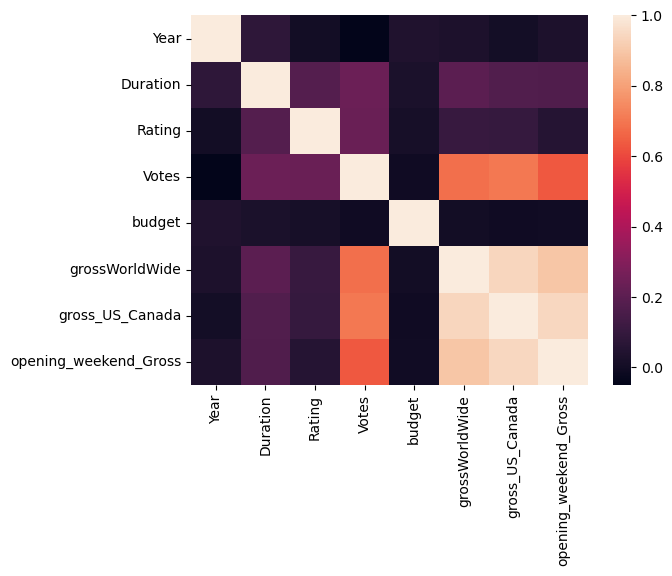

In [157]:
sns.heatmap(df.corr(numeric_only = True))

In [158]:
df.corr(numeric_only = True)['opening_weekend_Gross'].sort_values(ascending = False)

opening_weekend_Gross    1.000000
gross_US_Canada          0.942629
grossWorldWide           0.896206
Votes                    0.632565
Duration                 0.170159
Rating                   0.054916
Year                     0.030618
budget                  -0.004730
Name: opening_weekend_Gross, dtype: float64

* There is a high correlation between the columns 'opening_weekend_Gross', 'gross_US_Canada' and 'grossWorldWide'

In [159]:
from sklearn.impute import KNNImputer

In [160]:
df.columns

Index(['Title', 'Year', 'Duration', 'MPA', 'Rating', 'Votes', 'budget',
       'grossWorldWide', 'gross_US_Canada', 'opening_weekend_Gross',
       'directors', 'writers', 'stars', 'genres', 'countries_origin',
       'filming_locations', 'production_companies', 'Languages'],
      dtype='object')

In [161]:
numerical_cols = ['opening_weekend_Gross', 'gross_US_Canada', 'grossWorldWide'] # These columns are highly correlated

knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df[numerical_cols]), columns = numerical_cols)

In [162]:
df_imputed['grossWorldWide']

0        3.466761e+08
1        4.296321e+08
2        5.463881e+08
3        4.655162e+08
4        3.741117e+08
             ...     
13281    2.397623e+06
13282    3.301976e+06
13283    4.467315e+07
13284    4.467315e+07
13285    1.300170e+05
Name: grossWorldWide, Length: 13286, dtype: float64

In [163]:
df.reset_index(inplace = True)

In [164]:
df['grossWorldWide'] = df_imputed['grossWorldWide']
df['gross_US_Canada'] = df_imputed['gross_US_Canada']
df['opening_weekend_Gross'] = df_imputed['opening_weekend_Gross']

In [165]:
df.drop(columns = ['index'], inplace = True)

In [166]:
df.describe()

,Year,Duration,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross
count,13286.000000,13286.000000,13286.000000,1.328600e+04,6.173000e+03,1.328600e+04,1.328600e+04,1.328600e+04
mean,2012.126524,105.546289,6.359980,5.388789e+04,1.385510e+08,4.465359e+07,1.803175e+07,5.332111e+06
std,7.266062,20.847654,1.059198,1.387050e+05,3.940316e+09,1.326836e+08,5.098098e+07,1.576300e+07
min,2000.000000,0.000000,1.100000,7.000000e+00,1.000000e+00,9.500000e+01,8.000000e+01,1.100000e+01
25%,2006.000000,92.000000,5.800000,1.400000e+03,4.000000e+06,1.822745e+05,6.617200e+04,1.236225e+04
50%,2012.000000,101.000000,6.500000,7.600000e+03,1.500000e+07,3.025410e+06,5.634820e+05,8.028200e+04
75%,2019.000000,115.000000,7.100000,4.100000e+04,4.200000e+07,4.467315e+07,1.874013e+07,5.800534e+06
max,2024.000000,398.000000,9.600000,3.000000e+06,3.000000e+11,2.923706e+09,9.366622e+08,3.571150e+08


# Analysis of Missing Budget Values

In [167]:
temp = (df['budget'].isnull().mean() * 100).round(2)
print(f"Percentage of Missing Budget Values in the Dataset: {temp}%")
# Approx half of the budget values are missing

Percentage of Missing Budget Values in the Dataset: 53.54%


In [168]:
missing_budget_df = df[df['budget'].isnull()]

In [169]:
plt.figure(figsize = (5, 5))
budget_missing_df = (missing_budget_df.groupby("Year").size() / df.shape[0] * 100).sort_values(ascending = False).reset_index(name = 'Missing Percentage')
fig = px.line(
    budget_missing_df,
    x = 'Year',
    y = 'Missing Percentage',
    title = 'Yearly Analysis of Missing Budget Percentages'
)
fig.show()

<Figure size 500x500 with 0 Axes>

* There is no specific relation between year and missing budget values but year 2024 has most percentage of missing budget values.

In [170]:
budget_collection_relation = df.groupby(df['budget'].isnull()).agg(
    grossWorldWide = ('grossWorldWide', 'mean'),
    gross_US_Canada = ('gross_US_Canada', 'mean'),
    opening_weekend_Gross = ('opening_weekend_Gross', 'mean')
)
budget_collection_relation['grossWorldWide'] = (budget_collection_relation['grossWorldWide'] / 1000000).apply(collections)
budget_collection_relation['gross_US_Canada'] = (budget_collection_relation['gross_US_Canada'] / 1000000).apply(collections)
budget_collection_relation['opening_weekend_Gross'] = (budget_collection_relation['opening_weekend_Gross'] / 1000000).apply(collections)
budget_collection_relation.rename(columns = {'grossWorldWide' : 'Avg. Worldwide Collections', 'gross_US_Canada' : 'Avg. US & Canada Collections', 'opening_weekend_Gross' : 'Avg. Opening Weekend Collections'}, inplace = True)
budget_collection_relation.rename_axis("Missing Budget?", inplace = True)
budget_collection_relation

,Avg. Worldwide Collections,Avg. US & Canada Collections,Avg. Opening Weekend Collections
Missing Budget?,,,
False,$83.95 Million,$34.97 Million,$10.31 Million
True,$10.55 Million,$3.34 Million,$1.01 Million


In [171]:
budget_missing_pct = (df.explode("genres").groupby("genres")['budget'].apply(lambda x: x.isnull().mean()) * 100).sort_values(ascending = False).reset_index(name = 'Missing Percentage')
budget_missing_pct = budget_missing_pct[budget_missing_pct['genres'] != 'Unknown'].head(10)
fig = px.bar(
    budget_missing_pct, 
    x = 'genres',
    y = 'Missing Percentage',
    labels = {'genres' : 'Genres'},
    title = 'Top 10 Genres with the Highest Percentage of Missing Budget Values'
)
fig.show()

### Conclusion about missing budget values
- `Budget is missing for less successful movies.`
  
- `Possible Reasons`:-
1) Smaller/Independent Films May Not Report Budgets
2) If a movie flopped, studios may not see value in reporting the budget.
3) Bias in Data Source - IMDB may not have incomplete budget data for smaller movies.

-  `Most of the genres having high percentage of missing budget values are Low-Budget Categories`:- 
1) Documentary-related genres (like Food Documentary, Music Documentary, etc.)
2) Anime-related genres (like Shōnen, Seinen, etc.)
3) Low-production-cost genres (Reality TV, News, Concert, etc.)

# Analysis of Filming Locations Missing Values

In [172]:
temp = (df[df['filming_locations'] == 'Unknown'].shape[0] / df.shape[0]) * 100
print(f"Percentage of Missing Filming Location Values in the Dataset: {temp}%")

Percentage of Missing Filming Location Values in the Dataset: 20.736113201866626%


In [173]:
location_collection_relation = df.groupby(df['filming_locations'] == 'Unknown').agg(
    grossWorldWide = ('grossWorldWide', 'mean'),
    gross_US_Canada = ('gross_US_Canada', 'mean'),
    opening_weekend_Gross = ('opening_weekend_Gross', 'mean')
)
location_collection_relation['grossWorldWide'] = (location_collection_relation['grossWorldWide'] / 1000000).apply(collections)
location_collection_relation['gross_US_Canada'] = (location_collection_relation['gross_US_Canada'] / 1000000).apply(collections)
location_collection_relation['opening_weekend_Gross'] = (location_collection_relation['opening_weekend_Gross'] / 1000000).apply(collections)
location_collection_relation.rename(columns = {'grossWorldWide' : 'Avg. Worldwide Collections', 'gross_US_Canada' : 'Avg. US & Canada Collections', 'opening_weekend_Gross' : 'Avg. Opening Weekend Collections'}, inplace = True)
location_collection_relation.rename_axis('Missing Filming Location?', inplace = True)
location_collection_relation

,Avg. Worldwide Collections,Avg. US & Canada Collections,Avg. Opening Weekend Collections
Missing Filming Location?,,,
False,$50.23 Million,$20.82 Million,$6.16 Million
True,$23.32 Million,$7.38 Million,$2.16 Million


In [174]:
location_missing_pct = (df.explode("genres").groupby("genres")['filming_locations'].apply(lambda x: (x == 'Unknown').mean()) * 100).sort_values(ascending = False).reset_index(name = 'Missing Percentage')
location_missing_pct = location_missing_pct[location_missing_pct['genres'] != 'Unknown'].head(10)
fig = px.bar(
    location_missing_pct, 
    x = 'genres',
    y = 'Missing Percentage',
    labels = {'genres' : 'Genres'},
    title = 'Top 10 Genres with the Highest Percentage of Missing Filming Location Values'
)
fig.show()

### Conclusion about missing filming_location values
- Missing filming_location is not random—it’s highly dependent on genre.
-  Genres with most missing values are primarily animation, documentaries, and TV formats, which don’t have clear filming locations.
-  Lower worldwide gross earnings suggest these genres have smaller productions and limited releases.
-  So it will be good to flag movies as "Studio-Based" vs. "Location-Based" for better analysis.

In [175]:
studio_based_genres = (df.explode("genres").groupby("genres")['filming_locations'].apply(lambda x: (x == 'Unknown').mean()) * 100).sort_values(ascending = False).head(30)
def flag_filming_locations(genres):
    """
    Function to flog movies as "Studio-Based" and "Location-Based"
    """
    if any(genre in studio_based_genres for genre in genres):
        return 'Studio-Based'
    else:
        return 'Location-Based'

In [176]:
# Converting the dtype of filming_location_category to category
df['filming_location_category'] = df['genres'].apply(flag_filming_locations).astype("category")

### Converting the units of the columns 'grossWorldWide', 'gross_US_Canada' and 'opening_weekend_Gross' for better readability

In [177]:
gross_columns = ['grossWorldWide', 'gross_US_Canada', 'opening_weekend_Gross']

# convert values to millions
df[gross_columns] = df[gross_columns] / 1000000

# rename the columns
df.rename(columns = lambda x: x + ' (in Millions)' if x in gross_columns else x, inplace = True)

df.sample(5)

,Title,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide (in Millions),gross_US_Canada (in Millions),opening_weekend_Gross (in Millions),directors,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,filming_location_category
13070,Spellbound,2024,109,PG,5.7,5200.0,NaN,44.673150,18.740126,5.800534,[Vicky Jenson],"[Vicky Jenson, Lauren Hynek, Elizabeth Martin]","[Rachel Zegler, John Lithgow, Jenifer Lewis]","[Computer Animation, Adventure, Animation, Com...","[Spain, United States]","[Madrid, Spain]","[Ilion Animation Studios, Netflix Animation, S...",[English],Studio-Based
2579,Wild Things 2,2004,95,R,4.5,8000.0,2800000.0,44.673150,18.740126,5.800534,[Jack Perez],"[Ross Helford, Andy Hurst, Stephen Peters]","[Susan Ward, Katie Stuart, Leila Arcieri]","[Erotic Thriller, Crime, Drama, Mystery, Thril...",[United States],"[Venice, Los Angeles, California, USA]","[Destination Films, Mandalay Pictures, Magic H...",[English],Location-Based
5010,The Secret of Kells,2009,75,Not Rated,7.5,39000.0,8000000.0,1.821949,0.676775,0.039826,"[Tomm Moore, Nora Twomey]","[Tomm Moore, Fabrice Ziolkowski]","[Evan McGuire, Brendan Gleeson, Mick Lally]","[Adventure, Animation, Family, Fantasy]","[Ireland, Belgium, France, Luxembourg]","[Cartoon Saloon, The Maltings, Tilbury Place, ...","[Les Armateurs, Vivi Film, Cartoon Saloon]","[Irish Gaelic, Norwegian, Latin, English]",Studio-Based
56,The Beach,2000,119,R,6.6,259000.0,50000000.0,144.056873,39.785027,15.277921,[Danny Boyle],"[John Hodge, Alex Garland]","[Leonardo DiCaprio, Tilda Swinton, Daniel York]","[Adventure, Drama, Romance, Thriller]","[United Kingdom, United States]","[Maya Bay, Ko Phi Phi Leh, Thailand]",[Figment Films],"[English, Mandingo, French, Swedish, Thai, Ser...",Location-Based
12311,Creation of the Gods I: Kingdom of Storms,2023,148,Not Rated,6.7,4800.0,800000000.0,373.021923,1.706355,0.931140,[Wuershan],"[Jianan Ran, Ping Ran, Cao Sheng]","[Huang Bo, Kris Phillips, Xuejian Li]","[Fantasy Epic, Martial Arts, Adventure, Drama,...",[China],"[WanDa Studios, Qingdao, China]","[Tencent Pictures, Beijing Culture, Mongketeng...","[Mandarin, Urdu]",Location-Based


In [178]:
df.rename(columns = {'Duration' : 'Duration (in Minutes)'}, inplace = True)

In [179]:
df['budget'] = df['budget'] / 1000000
df.rename(columns = {'budget' : 'budget (in Millions)'}, inplace = True)

In [180]:
df.head(5)

,Title,Year,Duration (in Minutes),MPA,Rating,Votes,budget (in Millions),grossWorldWide (in Millions),gross_US_Canada (in Millions),opening_weekend_Gross (in Millions),directors,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,filming_location_category
0,How the Grinch Stole Christmas,2000,104,PG,6.4,308000.0,123.0,346.676095,261.415800,55.082330,[Ron Howard],"[Dr. Seuss, Jeffrey Price, Peter S. Seaman]","[Jim Carrey, Taylor Momsen, Kelley]","[Holiday Comedy, Holiday Family, Quirky Comedy...","[United States, Germany]","[Solitude Mountain Resort, Utah, USA]","[Universal Pictures, Imagine Entertainment, LU...",[English],Location-Based
1,Cast Away,2000,143,PG-13,7.8,656000.0,90.0,429.632142,233.632142,28.883406,[Robert Zemeckis],[William Broyles Jr.],"[Tom Hanks, Helen Hunt, Paul Sanchez]","[Survival, Adventure, Drama, Romance]",[United States],"[Monuriki, Fiji]","[Twentieth Century Fox, Dreamworks Pictures, I...","[English, Russian]",Location-Based
2,Mission: Impossible II,2000,123,PG-13,6.1,386000.0,125.0,546.388108,215.409889,57.845297,[John Woo],"[Bruce Geller, Ronald D. Moore, Brannon Braga]","[Tom Cruise, Dougray Scott, Thandiwe Newton]","[Action, Adventure, Thriller]","[United States, Germany, Australia]","[Dead Horse Point State Park, Utah, USA]","[Paramount Pictures, Cruise/Wagner Productions...",[English],Location-Based
3,Gladiator,2000,155,R,8.5,1700000.0,103.0,465.516248,187.705427,34.819017,[Ridley Scott],"[David Franzoni, John Logan, William Nicholson]","[Russell Crowe, Joaquin Phoenix, Connie Nielsen]","[Action Epic, Adventure Epic, Epic, Period Dra...","[United States, United Kingdom, Malta, Morocco]","[Ouarzazate, Morocco]","[Dreamworks Pictures, Universal Pictures, Scot...",[English],Location-Based
4,What Women Want,2000,127,PG-13,6.5,228000.0,70.0,374.111707,182.811707,33.614543,[Nancy Meyers],"[Josh Goldsmith, Cathy Yuspa, Diane Drake]","[Mel Gibson, Helen Hunt, Marisa Tomei]","[High-Concept Comedy, Romantic Comedy, Comedy,...",[United States],[Dresden Room Restaurant - 1760 N. Vermont Ave...,"[Paramount Pictures, Icon Entertainment Intern...",[English],Location-Based


# Outlier detection

In [181]:
df.describe()

,Year,Duration (in Minutes),Rating,Votes,budget (in Millions),grossWorldWide (in Millions),gross_US_Canada (in Millions),opening_weekend_Gross (in Millions)
count,13286.000000,13286.000000,13286.000000,1.328600e+04,6173.000000,13286.000000,13286.000000,13286.000000
mean,2012.126524,105.546289,6.359980,5.388789e+04,138.551033,44.653588,18.031746,5.332111
std,7.266062,20.847654,1.059198,1.387050e+05,3940.315612,132.683598,50.980978,15.763002
min,2000.000000,0.000000,1.100000,7.000000e+00,0.000001,0.000095,0.000080,0.000011
25%,2006.000000,92.000000,5.800000,1.400000e+03,4.000000,0.182275,0.066172,0.012362
50%,2012.000000,101.000000,6.500000,7.600000e+03,15.000000,3.025410,0.563482,0.080282
75%,2019.000000,115.000000,7.100000,4.100000e+04,42.000000,44.673150,18.740126,5.800534
max,2024.000000,398.000000,9.600000,3.000000e+06,300000.000000,2923.706026,936.662225,357.115007


### In the columns grossWorldWide (in Millions), gross_US_Canada (in Millions) and opening_weekend_Gross (in Millions) columns, we can see sudden jumps between - 
1) 50 percentile and 75 percentile
2) 75 percentile and 100 percentile

- Also, there is a sudden jump between 75 percentile and 100 percentile in budget and duration columns.
- So, let's detect the outliers in these columns.

# Outlier detection in budget column

In [182]:
df[df['budget (in Millions)'] == 300000.000000]

,Title,Year,Duration (in Minutes),MPA,Rating,Votes,budget (in Millions),grossWorldWide (in Millions),gross_US_Canada (in Millions),opening_weekend_Gross (in Millions),directors,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,filming_location_category
12938,Harbin,2024,108,Unknown,7.0,175.0,300000.0,15.580789,0.063555,0.027923,[Min-ho Woo],"[Min-Seong Kim, Min-ho Woo]","[Hyun Bin, Lee Dong-wook, Jeon Yeo-been]","[Spy, Action, Biography, Crime, History, Thril...",[South Korea],[Latvia],"[CJ ENM Co., CJ Entertainment, Film Angels Stu...","[Korean, Japanese]",Location-Based


<Axes: xlabel='budget (in Millions)', ylabel='Density'>

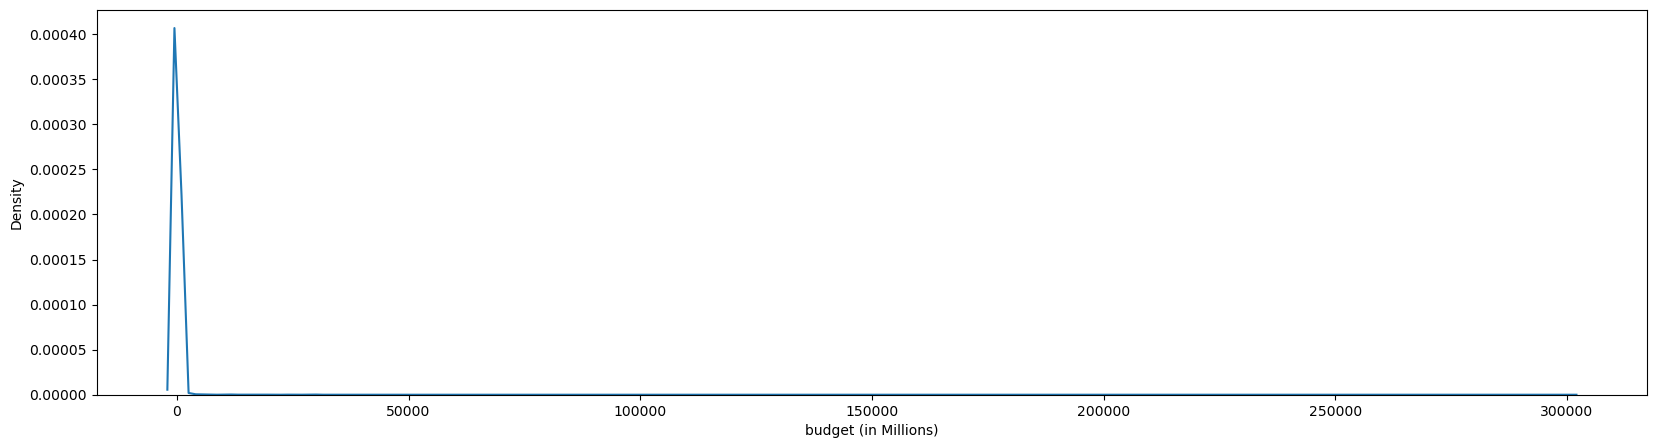

In [183]:
plt.figure(figsize = (20, 5))
sns.kdeplot(df['budget (in Millions)'])

<Axes: ylabel='budget (in Millions)'>

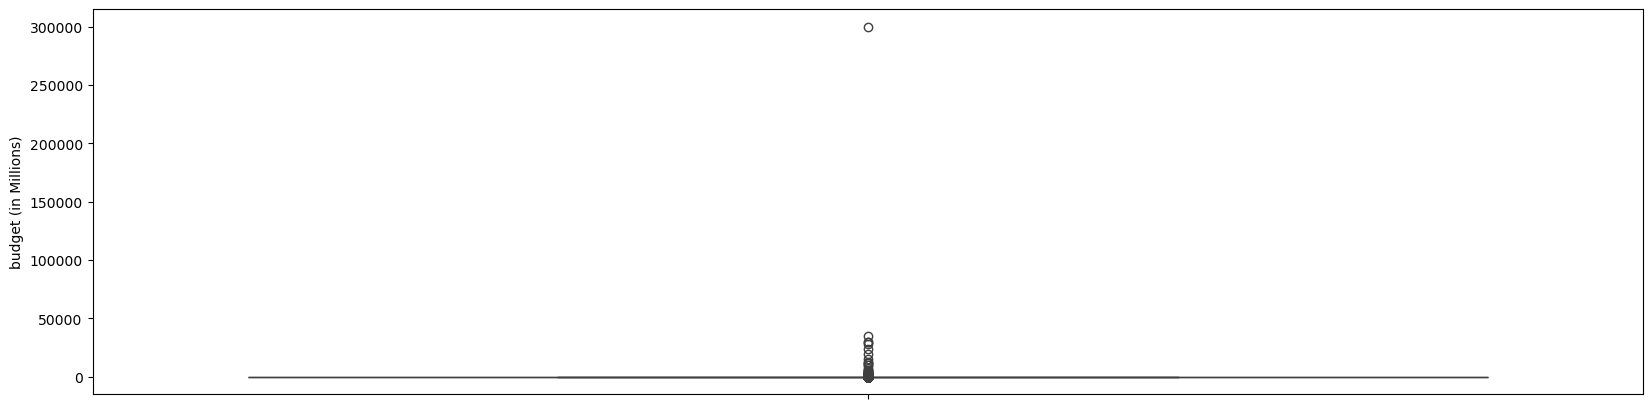

In [184]:
plt.figure(figsize = (20, 5))
sns.boxplot(df['budget (in Millions)'])

In [185]:
# Calculating percentage of outliers in budgets column
q1 = df['budget (in Millions)'].quantile(0.25)
q3 = df['budget (in Millions)'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

budget_outliers = df[(df['budget (in Millions)'] < lower_bound) | (df['budget (in Millions)'] > upper_bound)]

print("Percentage of outliers in budget column -", ((len(budget_outliers) / len(df)) * 100))

Percentage of outliers in budget column - 5.125696221586633


In [186]:
df[df['budget (in Millions)'] > 447]

,Title,Year,Duration (in Minutes),MPA,Rating,Votes,budget (in Millions),grossWorldWide (in Millions),gross_US_Canada (in Millions),opening_weekend_Gross (in Millions),directors,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,filming_location_category
460,Ask Me If I'm Happy,2000,100,Unknown,7.1,7900.0,7000.0,44.673150,18.740126,5.800534,"[Aldo Baglio, Giacomo Poretti, Giovanni Storti]","[Massimo Venier, Aldo Baglio, Giovanni Storti]","[Aldo Baglio, Giovanni Storti, Giacomo Poretti]","[Comedy, Drama]",[Italy],"[Cremona, Lombardia, Italy]","[Agidi, Kubla Khan, Medusa Film]",[Italian],Location-Based
1236,Devdas,2002,185,Unknown,7.5,48000.0,500.0,5.428774,2.745382,0.655733,[Sanjay Leela Bhansali],"[Sarat Chandra Chattopadhyay, Prakash Kapadia,...","[Shah Rukh Khan, Aishwarya Rai Bachchan, Madhu...","[Drama, Musical, Romance]",[India],"[Bikaner, Rajasthan, India]","[Red Chillies Entertainment, Mega Bollywood]",[Hindi],Location-Based
1815,The Hero: Love Story of a Spy,2003,160,Not Rated,5.5,2700.0,530.0,5.835846,0.285394,0.130200,[Anil Sharma],[Shaktimaan Talwar],"[Sunny Deol, Preity G Zinta, Priyanka Chopra J...","[Action, Adventure, Drama, Thriller]",[India],[Canada],"[Time Films, Time Movies]",[Hindi],Location-Based
2252,Ghost in the Shell 2: Innocence,2004,100,PG-13,7.4,41000.0,2000.0,10.123315,1.334074,0.317722,"[Mamoru Oshii, Naoko Kusumi, Mizuho Nishikubo]","[Shirow Masamune, Mamoru Oshii]","[Akio Ôtsuka, Atsuko Tanaka, Tamio Ôki]","[Adult Animation, Anime, Artificial Intelligen...",[Japan],Unknown,"[Bandai Visual Company, Buena Vista Home Enter...","[Japanese, Cantonese, English]",Studio-Based
2632,Swing Girls,2004,104,Unknown,7.5,5000.0,500.0,18.758613,11.740712,3.506129,[Shinobu Yaguchi],"[Shinobu Yaguchi, Junko Yaguchi]","[Juri Ueno, Yûta Hiraoka, Shihori Kanjiya]","[Comedy, Drama, Music]",[Japan],"[Yamagata, Japan]","[Altamira Pictures Inc., DENTSU Music And Ente...",[Japanese],Location-Based
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12496,MR-9: Do or Die,2023,106,Unknown,3.5,1300.0,800.0,0.109706,0.049224,0.031000,[Asif Akbar],"[Asif Akbar, Nazim Ud Daula, Abdul Aziz]","[Frank Grillo, Michael Jai White, Matt Passmore]","[Action, Drama, Thriller]","[United States, Bangladesh]","[Dhaka, Bangladesh]","[Jaaz Multimedia, Al Bravo Films, Avail Entert...","[English, Bengali]",Location-Based
12759,Kalki 2898 AD,2024,180,Not Rated,7.0,63000.0,6000.0,130.000000,18.289575,5.668275,[Nag Ashwin],[Nag Ashwin],"[Prabhas, Amitabh Bachchan, Kamal Haasan]","[Action Epic, Desert Adventure, Dystopian Sci-...",[India],"[Ramoji Film City, Hyderabad, Telangana, India]",[Vyjayanthi Movies],[Telugu],Location-Based
12850,Indian 2,2024,180,Unknown,3.9,16000.0,2000.0,1.883599,1.200000,1.200000,[S. Shankar],"[G. Chandrasekhar, Jayamohan, Vamsy Krishna]","[Kamal Haasan, Siddharth, Rakul Preet Singh]","[Action, Drama, Thriller]",[India],[Andhra Pradesh],"[Lyca Productions, Red Giant Movies]",[Tamil],Location-Based
12938,Harbin,2024,108,Unknown,7.0,175.0,300000.0,15.580789,0.063555,0.027923,[Min-ho Woo],"[Min-Seong Kim, Min-ho Woo]","[Hyun Bin, Lee Dong-wook, Jeon Yeo-been]","[Spy, Action, Biography, Crime, History, Thril...",[South Korea],[Latvia],"[CJ ENM Co., CJ Entertainment, Film Angels Stu...","[Korean, Japanese]",Location-Based


* All the Budget values in the above output are wrong as highest budget for any movie is 447 million dollars for the movie 'Star Wars: The Force Awakens'

In [187]:
df[df['Title'] == 'Star Wars: Episode VII - The Force Awakens']

,Title,Year,Duration (in Minutes),MPA,Rating,Votes,budget (in Millions),grossWorldWide (in Millions),gross_US_Canada (in Millions),opening_weekend_Gross (in Millions),directors,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,filming_location_category
7890,Star Wars: Episode VII - The Force Awakens,2015,138,PG-13,7.8,990000.0,245.0,2071.310218,936.662225,247.966675,[J.J. Abrams],"[Lawrence Kasdan, J.J. Abrams, Michael Arndt]","[Daisy Ridley, John Boyega, Oscar Isaac]","[Action Epic, Adventure Epic, Globetrotting Ad...","[United States, United Kingdom]","[Skellig Michael, County Kerry, Ireland]","[Lucasfilm, Bad Robot]",[English],Location-Based


*  From the above results, we can say that budget column contains many inaccurate values.
* Since more than 50% values are missing in budget column and also it contains many inaccurate values. Dropping it seems a good choice.

In [188]:
df.drop(columns = ['budget (in Millions)'], inplace = True)

# Outlier detection in gross_US_Canada (in Millions) column

<Axes: xlabel='gross_US_Canada (in Millions)', ylabel='Density'>

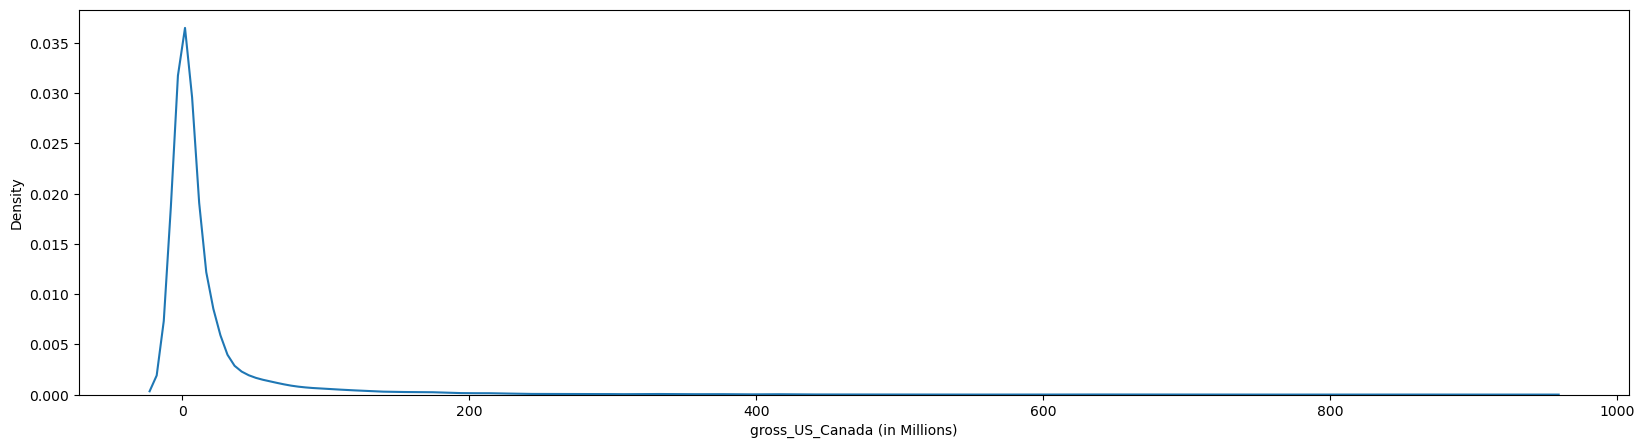

In [189]:
plt.figure(figsize = (20, 5))
sns.kdeplot(df['gross_US_Canada (in Millions)'])

In [190]:
# Calculating percentage of outliers in gross_US_Canada (in Millions) column
q1 = df['gross_US_Canada (in Millions)'].quantile(0.25)
q3 = df['gross_US_Canada (in Millions)'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

gross_US_Canada_outliers = df[(df['gross_US_Canada (in Millions)'] < lower_bound) | (df['gross_US_Canada (in Millions)'] > upper_bound)]

print("Percentage of outliers in gross_US_Canada (in Millions) column -", ((len(gross_US_Canada_outliers) / len(df)) * 100))

Percentage of outliers in gross_US_Canada (in Millions) column - 9.995483968086708


In [191]:
df[df['gross_US_Canada (in Millions)'] == df['gross_US_Canada (in Millions)'].max()]

,Title,Year,Duration (in Minutes),MPA,Rating,Votes,grossWorldWide (in Millions),gross_US_Canada (in Millions),opening_weekend_Gross (in Millions),directors,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,filming_location_category
7890,Star Wars: Episode VII - The Force Awakens,2015,138,PG-13,7.8,990000.0,2071.310218,936.662225,247.966675,[J.J. Abrams],"[Lawrence Kasdan, J.J. Abrams, Michael Arndt]","[Daisy Ridley, John Boyega, Oscar Isaac]","[Action Epic, Adventure Epic, Globetrotting Ad...","[United States, United Kingdom]","[Skellig Michael, County Kerry, Ireland]","[Lucasfilm, Bad Robot]",[English],Location-Based


In [192]:
df[df['Title'] == 'Avatar']

,Title,Year,Duration (in Minutes),MPA,Rating,Votes,grossWorldWide (in Millions),gross_US_Canada (in Millions),opening_weekend_Gross (in Millions),directors,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,filming_location_category
4792,Avatar,2009,162,PG-13,7.9,1400000.0,2923.706026,785.221649,77.025481,[James Cameron],[James Cameron],"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Adventure Epic, Fantasy Epic, Sci-Fi Epic, Ac...","[United States, United Kingdom]","[Kaua'i, Hawaii, USA]","[Twentieth Century Fox, Dune Entertainment, Li...","[English, Spanish]",Location-Based


* The outliers in 'gross_US_Canada (in Millions)' seem to carry actual information

# Outlier detection in grossWorldWide (in Millions) column

<Axes: xlabel='grossWorldWide (in Millions)', ylabel='Density'>

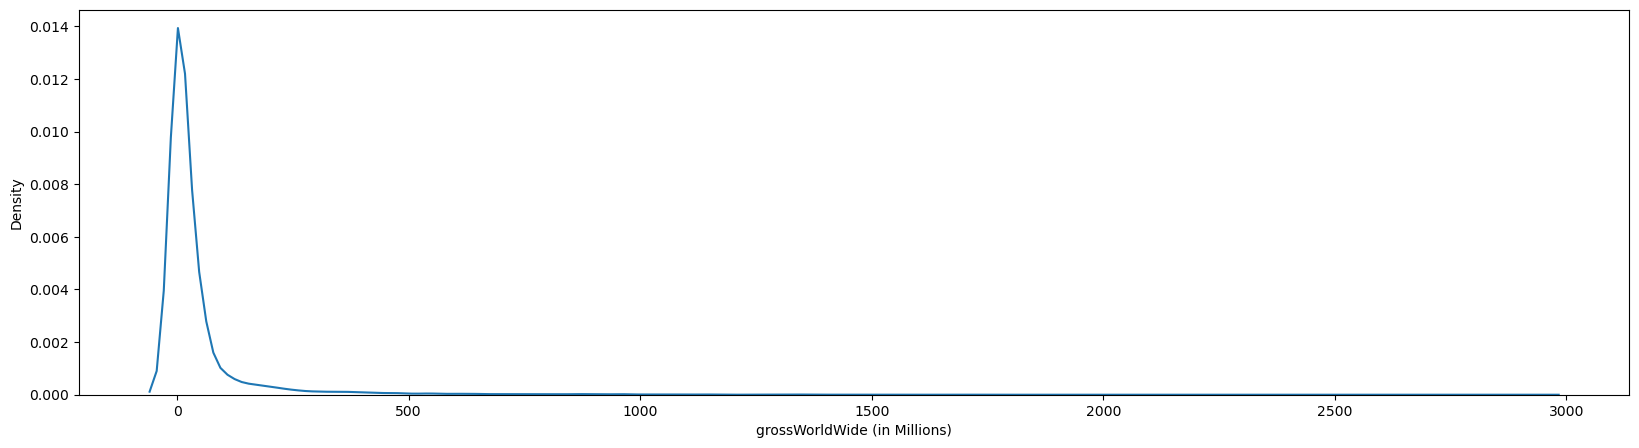

In [193]:
plt.figure(figsize = (20, 5))
sns.kdeplot(df['grossWorldWide (in Millions)'])

In [194]:
# Calculating percentage of outliers in grossWorldWide (in Millions) column
q1 = df['grossWorldWide (in Millions)'].quantile(0.25)
q3 = df['grossWorldWide (in Millions)'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

grossWorldWide_outliers = df[(df['grossWorldWide (in Millions)'] < lower_bound) | (df['grossWorldWide (in Millions)'] > upper_bound)]

print("Percentage of outliers in grossWorldWide (in Millions) column -", ((len(grossWorldWide_outliers) / len(df)) * 100))

Percentage of outliers in grossWorldWide (in Millions) column - 9.129911184705705


In [195]:
grossWorldWide_outliers[['Title', 'grossWorldWide (in Millions)']].sample(10)

,Title,grossWorldWide (in Millions)
9470,Christopher Robin,197.744825
3201,The Omen,119.975084
11556,Avatar: The Way of Water,2320.250281
10208,The Bravest,245.179562
4822,The Princess and the Frog,267.056816
1090,Stuart Little 2,169.956806
2656,The Longest Yard,191.466556
4201,Quantum of Solace,589.593688
2671,March of the Penguins,127.392693
9450,Spider-Man: Into the Spider-Verse,393.602435


In [196]:
df[df['grossWorldWide (in Millions)'] == df['grossWorldWide (in Millions)'].max()]

,Title,Year,Duration (in Minutes),MPA,Rating,Votes,grossWorldWide (in Millions),gross_US_Canada (in Millions),opening_weekend_Gross (in Millions),directors,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,filming_location_category
4792,Avatar,2009,162,PG-13,7.9,1400000.0,2923.706026,785.221649,77.025481,[James Cameron],[James Cameron],"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Adventure Epic, Fantasy Epic, Sci-Fi Epic, Ac...","[United States, United Kingdom]","[Kaua'i, Hawaii, USA]","[Twentieth Century Fox, Dune Entertainment, Li...","[English, Spanish]",Location-Based


* After cross checking some values, outliers in grossWorldWide (in Millions) column seem to contain actual information

# Outlier detection in opening_weekend_Gross (in Millions) column

<Axes: xlabel='opening_weekend_Gross (in Millions)', ylabel='Density'>

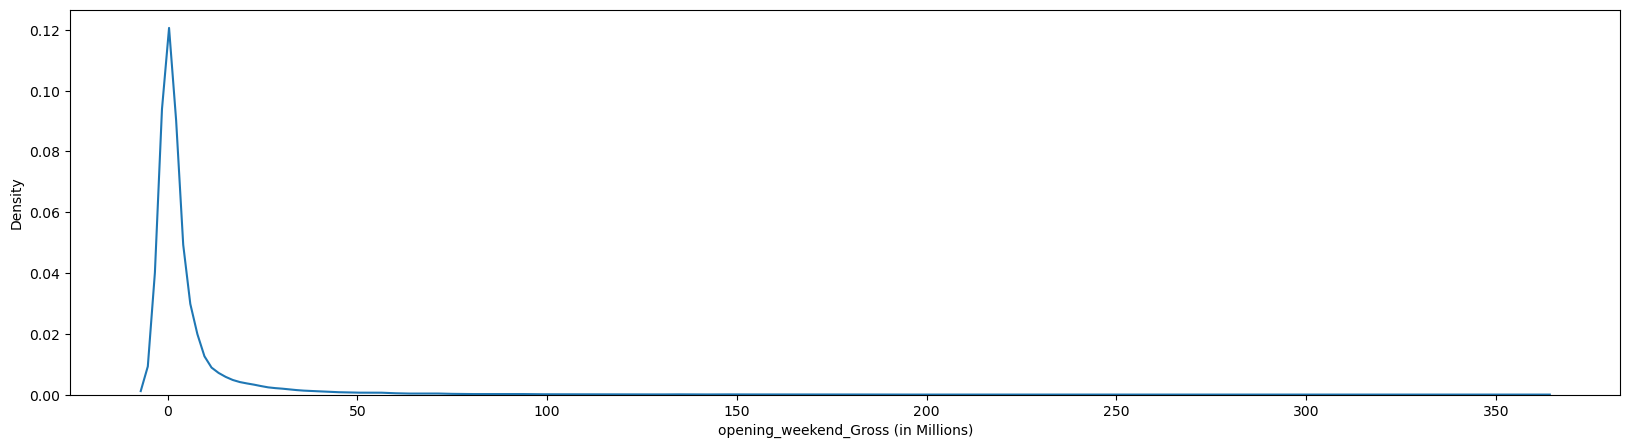

In [197]:
plt.figure(figsize = (20, 5))
sns.kdeplot(df['opening_weekend_Gross (in Millions)'])

In [198]:
# Calculating percentage of outliers in grossWorldWide (in Millions) column
q1 = df['opening_weekend_Gross (in Millions)'].quantile(0.25)
q3 = df['opening_weekend_Gross (in Millions)'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

opening_weekend_Gross_outliers = df[(df['opening_weekend_Gross (in Millions)'] < lower_bound) | (df['opening_weekend_Gross (in Millions)'] > upper_bound)]

print("Percentage of outliers in opening_weekend_Gross (in Millions) column -", ((len(opening_weekend_Gross_outliers) / len(df)) * 100))

Percentage of outliers in opening_weekend_Gross (in Millions) column - 9.604094535601385


In [199]:
opening_weekend_Gross_outliers[['Title', 'opening_weekend_Gross (in Millions)']].sample(10)

,Title,opening_weekend_Gross (in Millions)
1600,The Recruit,16.302063
12166,Elemental,29.602429
1059,Scooby-Doo,54.155312
3645,Transformers,70.502384
8407,Trolls,46.581142
3197,Invincible,17.031122
4264,Righteous Kill,16.288361
2661,The Pacifier,30.552694
5868,Just Go with It,30.514732
5353,Tron: Legacy,44.026211


In [200]:
df[df['opening_weekend_Gross (in Millions)'] == df['opening_weekend_Gross (in Millions)'].max()]
# Note :- We are seeing only maximum values and not minimum values for all the columns as many small independent films contain the minimum values.

,Title,Year,Duration (in Minutes),MPA,Rating,Votes,grossWorldWide (in Millions),gross_US_Canada (in Millions),opening_weekend_Gross (in Millions),directors,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,filming_location_category
9923,Avengers: Endgame,2019,181,PG-13,8.4,1300000.0,2799.4391,858.373,357.115007,"[Anthony Russo, Joe Russo]","[Christopher Markus, Stephen McFeely, Stan Lee]","[Robert Downey Jr., Chris Evans, Mark Ruffalo]","[Space Sci-Fi, Superhero, Time Travel, Tragedy...",[United States],"[Durham Cathedral, The College, Durham, County...",[Marvel Studios],"[English, Japanese, Xhosa, German]",Location-Based


* After cross checking some values, outliers in grossWorldWide (in Millions) column seem to contain actual information

# Outlier detection in Duration (in Minutes) column

<Axes: xlabel='Duration (in Minutes)', ylabel='Density'>

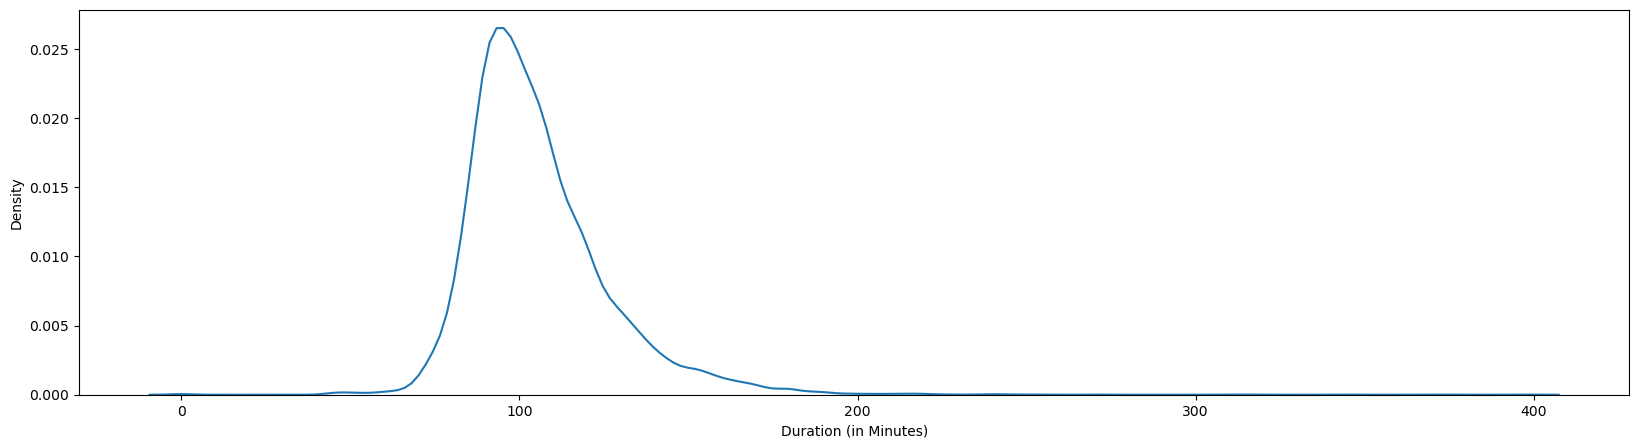

In [201]:
plt.figure(figsize = (20, 5))
sns.kdeplot(df['Duration (in Minutes)'])

In [202]:
# Calculating percentage of outliers in Duration (in Minutes) column
q1 = df['Duration (in Minutes)'].quantile(0.25)
q3 = df['Duration (in Minutes)'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

Duration_outliers = df[(df['Duration (in Minutes)'] < lower_bound) | (df['Duration (in Minutes)'] > upper_bound)]

print("Percentage of outliers in Duration (in Minutes) column -", ((len(Duration_outliers) / len(df)) * 100))

Percentage of outliers in Duration (in Minutes) column - 4.154749360228812


In [203]:
Duration_outliers[['Title', 'Duration (in Minutes)']].sample(10)

,Title,Duration (in Minutes)
4972,A Prophet,155
1081,Gangs of New York,167
3816,"Lust, Caution",157
9854,National Theatre Live: Macbeth,210
8912,Transformers: The Last Knight,154
416,One Piece: The Movie,51
11469,Zack Snyder's Justice League,242
11556,Avatar: The Way of Water,192
11634,Brahmastra Part One: Shiva,167
11283,Ennio,150


In [204]:
df[df['Duration (in Minutes)'] == df['Duration (in Minutes)'].max()]

,Title,Year,Duration (in Minutes),MPA,Rating,Votes,grossWorldWide (in Millions),gross_US_Canada (in Millions),opening_weekend_Gross (in Millions),directors,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,filming_location_category
1763,The Cremaster Cycle,2003,398,Not Rated,7.0,307.0,0.673268,0.665861,0.010785,[Matthew Barney],[Matthew Barney],[Matthew Barney],"[Drama, Fantasy, Horror, Musical]",[United States],Unknown,Unknown,"[English, Hungarian]",Location-Based


* After cross checking some values, outliers in Duration (in Minutes) column seem to contain actual information

In [206]:
# Exporting the cleaned dataset
# df.to_csv("movies_cleaned.csv")